In [1]:
using PhysOcean
using DIVAnd
using PyPlot
using Random

Generate random datasets, we set a fixed distance Δd between the observations.

In [4]:
Δd = 0.025
NN = 300;
err = 0.02
Random.seed!(642);
x1 = rand(NN);
Random.seed!(891);
y1 = rand(NN);
z1 = cos.(x1) + sin.(π * y1);
x2 = x1 .+ Δd
y2 = y1 .- Δd
z2 = z1 .+ err * (rand(NN) .- 0.5);

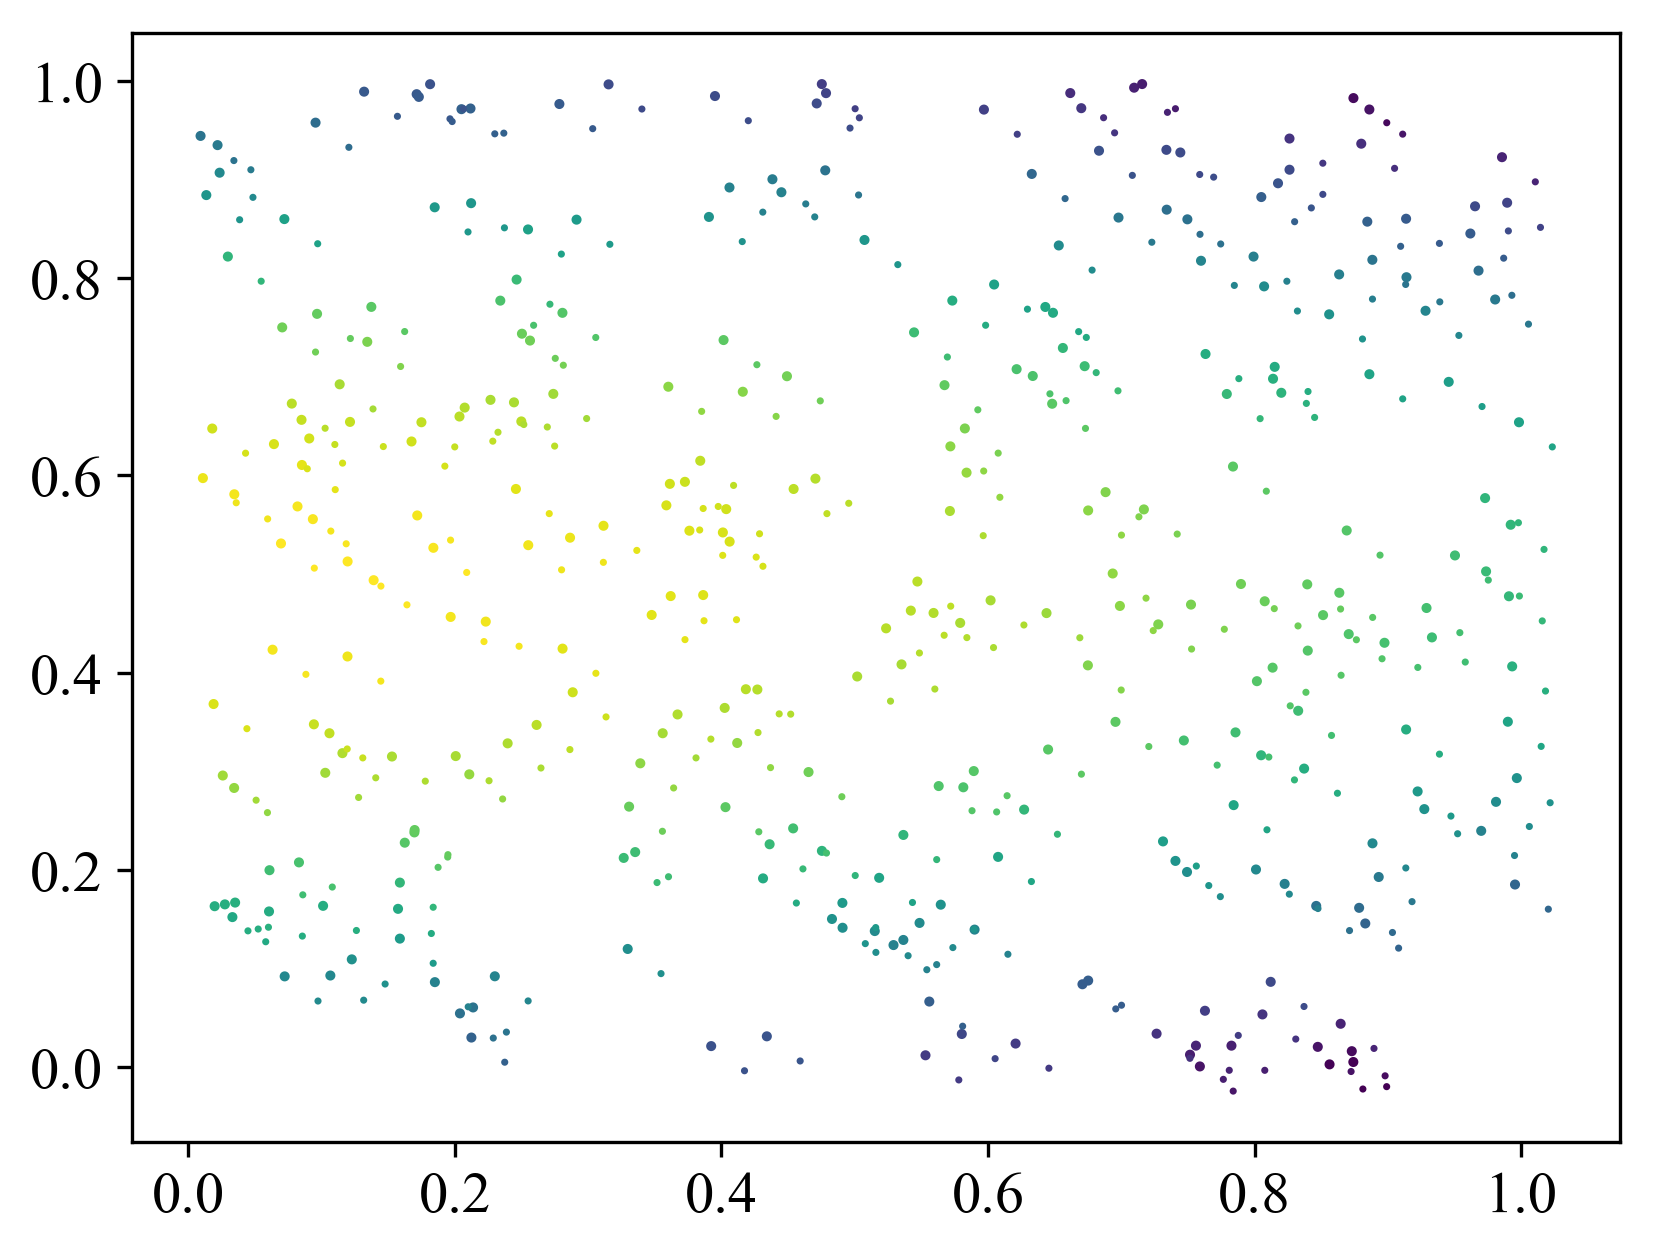

PyObject <matplotlib.collections.PathCollection object at 0x7f325c25a780>

In [5]:
PyPlot.scatter(x1, y1, c=z1, s=2)
PyPlot.scatter(x2, y2, c=z2, s=.5)

In [7]:
dupl = DIVAnd.Quadtrees.checkduplicates(
        (x1, y1), z1,
        (x2, y1), z2,
        (Δd, Δd), 0.1);
index = findall(.!isempty.(dupl));
ndupl = length(index);
pcdupl = ndupl / NN * 100;
@show pcdupl;

  0.003772 seconds (2.44 k allocations: 1.372 MiB)
pcdupl = 98.66666666666667


In [10]:
Δval = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
for tol in Δval
    dupl = DIVAnd.Quadtrees.checkduplicates(
        (x1, y1), z1,
        (x2, y1), z2,
        (Δd, Δd), tol);

    index = findall(.!isempty.(dupl));
    ndupl = length(index);
    pcdupl = ndupl / NN * 100;
    @show pcdupl;
end

pcdupl = 0.0
pcdupl = 0.6666666666666667
pcdupl = 10.333333333333334
pcdupl = 97.66666666666667
pcdupl = 98.66666666666667
pcdupl = 98.66666666666667
